<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/ARIMA_IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ARIMA para el índice IPC**


In [1]:
import pandas as pd
import yfinance as yf


In [2]:
ticker = yf.Tickers(["LABB.MX", "VESTA.MX", "ORBIA.MX", "GFNORTEO.MX", "BBAJIOO.MX", "MEGACPO.MX",
                     "AC.MX", "GCC.MX", "GENTERA.MX", "CUERVO.MX", "AMXB.MX", "GCARSOA1.MX",
                     "KIMBERA.MX", "GMEXICOB.MX", "CHDRAUIB.MX", "GRUMAB.MX", "KOFUBL.MX",
                     "RA.MX", "BOLSAA.MX", "ALSEA.MX", "TLEVISACPO.MX", "Q.MX", "BIMBOA.MX",
                     "PINFRA.MX", "GAPB.MX", "ASURB.MX", "OMAB.MX", "CEMEXCPO.MX"])
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  28 of 28 completed


Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,...,KOFUBL.MX,LABB.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702629,37.795326,11.671398,154.705292,NaN,34.200211,15.430022,11.531771,37.656044,NaN,...,NaN,19.345699,38.958515,38.346153,33.469948,130.751785,NaN,56.302017,88.730591,23.547865
2015-02-01 00:00:00+00:00,70.285477,43.193317,11.671398,161.849304,NaN,37.858749,16.780148,13.125944,44.382275,NaN,...,NaN,13.299149,39.022587,39.573231,35.096725,138.726166,NaN,57.645123,92.414070,23.328478
2015-03-01 00:00:00+00:00,69.477188,42.006329,11.124301,162.236115,NaN,38.791321,16.133081,12.536795,41.835007,NaN,...,NaN,11.775289,42.517670,41.436153,32.179729,126.094269,NaN,56.418175,91.677368,23.035963
2015-04-01 00:00:00+00:00,69.892464,43.400570,11.737049,171.416748,NaN,36.944115,18.360479,13.335611,41.735298,NaN,...,NaN,14.749670,45.450417,42.735737,35.491386,136.695770,NaN,63.874294,101.554520,23.328478
2015-05-01 00:00:00+00:00,70.519691,43.626663,11.744343,179.291840,NaN,37.374535,16.991688,12.993212,42.756989,NaN,...,NaN,13.535471,46.048351,40.197926,37.688400,130.000092,NaN,61.688995,105.901924,22.910900


In [3]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)
data = data.melt(ignore_index=False)
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()


,ds,y,unique_id
0,2015-01-01,65.702629,AC.MX
1,2015-02-01,70.285477,AC.MX
2,2015-03-01,69.477188,AC.MX
3,2015-04-01,69.892464,AC.MX
4,2015-05-01,70.519691,AC.MX


In [4]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

## **Análisis AC.MX**

In [7]:
accion1 = df[df['unique_id'] == 'AC.MX']


<Axes: xlabel='ds'>

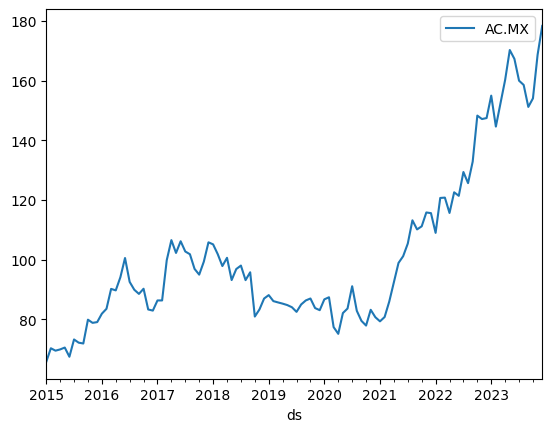

In [14]:
accion1.plot(x='ds', y='y', label="AC.MX")


<Axes: ylabel='Frequency'>

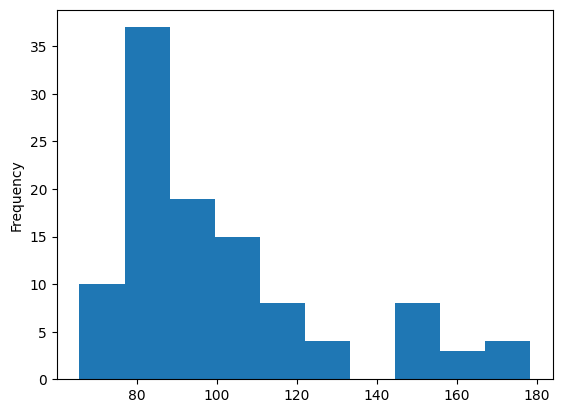

In [15]:
accion1['y'].plot(kind='hist', label="AC.MX")


In [16]:
accion1['y'].skew()


1.2270876989962838

In [17]:
accion1['y_diff'] = accion1['y'].diff()
accion1['y_ret'] = accion1['y'].pct_change()
accion1.dropna(inplace=True)
accion1.head()

<ipython-input-17-280151574ad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion1['y_diff'] = accion1['y'].diff()
<ipython-input-17-280151574ad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion1['y_ret'] = accion1['y'].pct_change()
<ipython-input-17-280151574ad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,ds,y,unique_id,y_diff,y_ret
1,2015-02-01,70.285477,AC.MX,4.582848,0.069751
2,2015-03-01,69.477188,AC.MX,-0.808289,-0.011500
3,2015-04-01,69.892464,AC.MX,0.415276,0.005977
4,2015-05-01,70.519691,AC.MX,0.627228,0.008974
5,2015-06-01,67.438515,AC.MX,-3.081177,-0.043692


<Axes: xlabel='ds'>

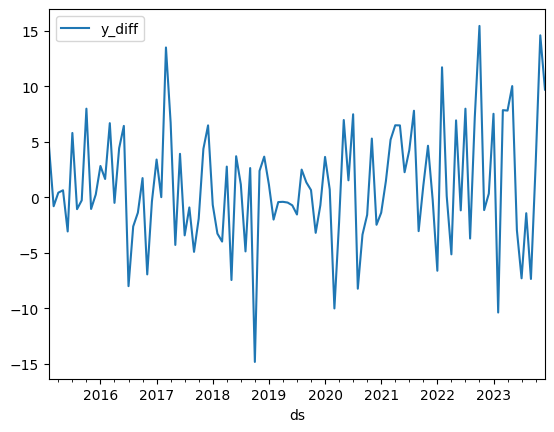

In [19]:
accion1.plot(x='ds', y='y_diff')


<Axes: xlabel='ds'>

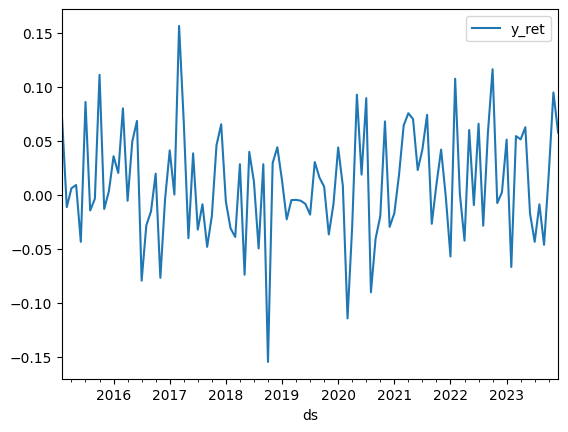

In [21]:
accion1.plot(x='ds', y='y_ret')


In [23]:
accion1['y_diff'].skew()


0.07277563868187545

<Axes: ylabel='Frequency'>

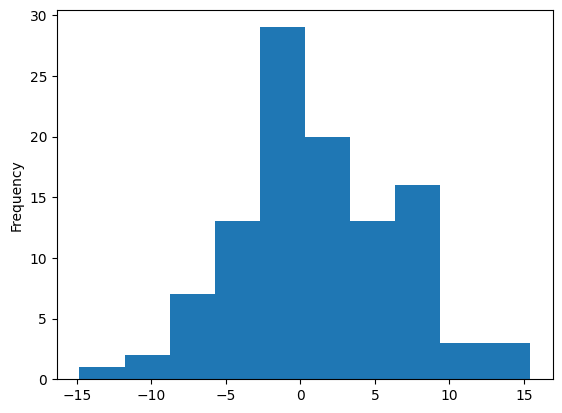

In [24]:
accion1['y_diff'].plot(kind='hist')


In [25]:

from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [26]:
Augmented_Dickey_Fuller_Test_func(accion1['y_diff'], 'Diff AC.MX')


Dickey-Fuller test results for columns: Diff AC.MX
Test Statistic                -1.024305e+01
p-value                        4.694581e-18
No Lags Used                   0.000000e+00
Number of observations used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [27]:
Augmented_Dickey_Fuller_Test_func(accion['y'], 'AC.MX')


Dickey-Fuller test results for columns: AC.MX
Test Statistic                   0.581692
p-value                          0.987156
No Lags Used                     0.000000
Number of observations used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


## **GMEXICOB.MX**

In [29]:
accion2 = df[df['unique_id'] == 'GMEXICOB.MX']


<Axes: xlabel='ds'>

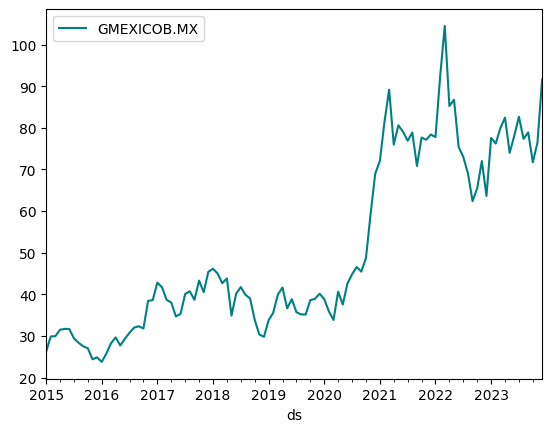

In [33]:
accion2.plot(x='ds', y='y', label="GMEXICOB.MX", color='teal')


<Axes: ylabel='Frequency'>

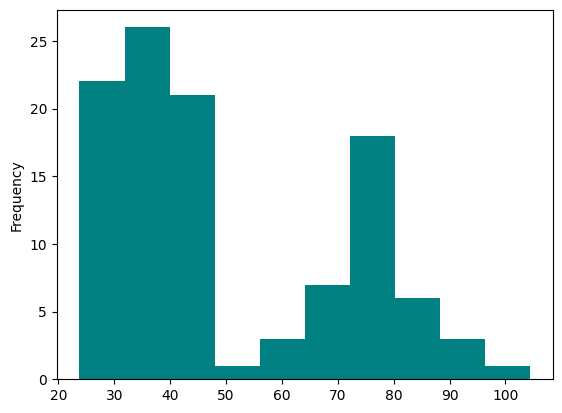

In [34]:
accion2['y'].plot(kind='hist', color='teal')


In [35]:
accion2['y'].skew()


0.6435409238860911

In [36]:
accion2['y_diff'] = accion2['y'].diff()
accion2['y_ret'] = accion2['y'].pct_change()
accion2.dropna(inplace=True)
accion2.head()

<ipython-input-36-85d8ee8e842d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion2['y_diff'] = accion2['y'].diff()
<ipython-input-36-85d8ee8e842d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion2['y_ret'] = accion2['y'].pct_change()
<ipython-input-36-85d8ee8e842d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,ds,y,unique_id,y_diff,y_ret
1621,2015-02-01,29.900442,GMEXICOB.MX,3.722681,0.142208
1622,2015-03-01,29.961420,GMEXICOB.MX,0.060978,0.002039
1623,2015-04-01,31.497734,GMEXICOB.MX,1.536314,0.051276
1624,2015-05-01,31.717199,GMEXICOB.MX,0.219465,0.006968
1625,2015-06-01,31.683176,GMEXICOB.MX,-0.034023,-0.001073


<Axes: xlabel='ds'>

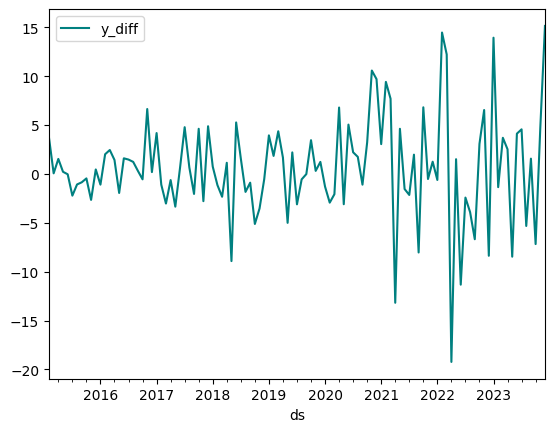

In [37]:
accion2.plot(x='ds', y='y_diff', color='teal')


<Axes: xlabel='ds'>

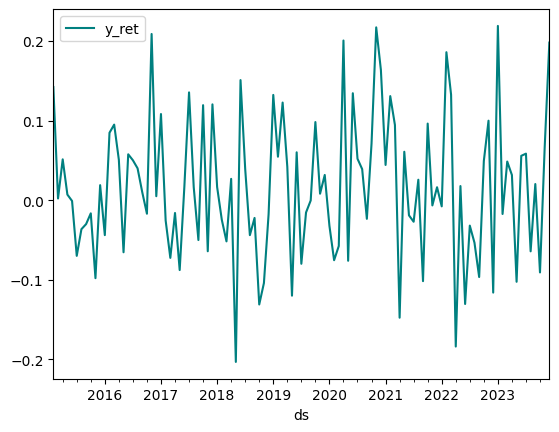

In [38]:
accion2.plot(x='ds', y='y_ret', color="teal")


In [39]:
accion2['y_diff'].skew()


-0.19737591634566495

<Axes: ylabel='Frequency'>

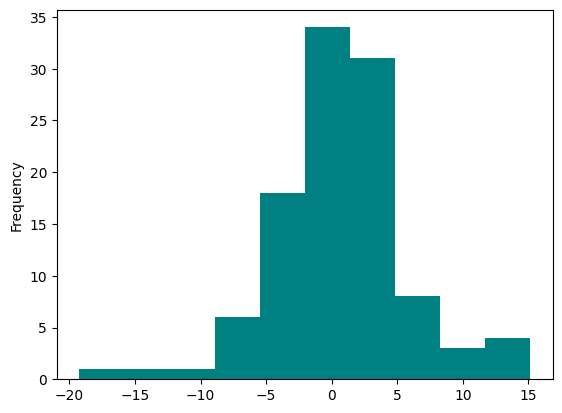

In [40]:
accion2['y_diff'].plot(kind='hist', color='teal')


In [41]:
Augmented_Dickey_Fuller_Test_func(accion2['y_diff'], 'Diff GMEXICOB.MX')


Dickey-Fuller test results for columns: Diff GMEXICOB.MX
Test Statistic                -1.126865e+01
p-value                        1.556567e-20
No Lags Used                   0.000000e+00
Number of observations used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [42]:
Augmented_Dickey_Fuller_Test_func(accion['y'], 'GMEXICOB.MX')


Dickey-Fuller test results for columns: GMEXICOB.MX
Test Statistic                   0.581692
p-value                          0.987156
No Lags Used                     0.000000
Number of observations used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


## **GCARSOA1.MX**

In [43]:
accion3 = df[df['unique_id'] == 'GCARSOA1.MX']


<Axes: xlabel='ds'>

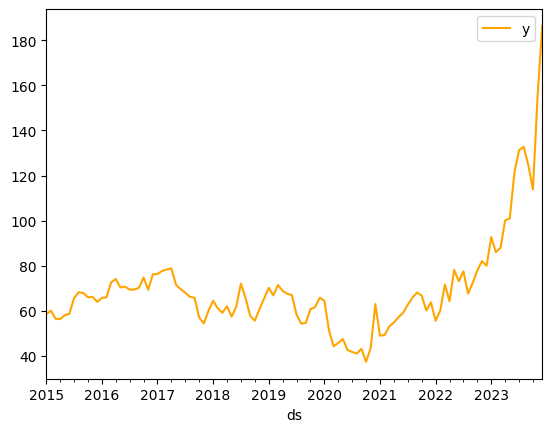

In [47]:
accion3.plot(x='ds', y='y', color="orange")


<Axes: ylabel='Frequency'>

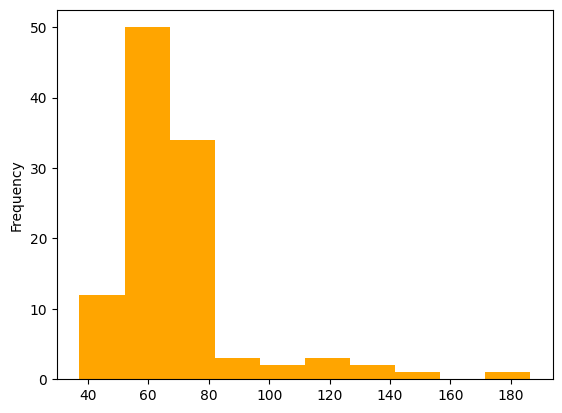

In [50]:
accion3['y'].plot(kind='hist', color="orange")
